<a href="https://colab.research.google.com/github/7PAM2015-0509-Team3/Kaggle_Challenge_Team3/blob/main/kaggle_challenge_Team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow_decision_forests

**Import Necessary Libraries**

In [3]:
from google.colab import files
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Upload and Load the train and test data**

In [4]:
# Upload the training data
#uploaded_train = files.upload()
# Load the training data
train_data = pd.read_csv("/content/drive/MyDrive/kg_datasets/train.csv")

In [5]:
# Upload the test data
#uploaded_test = files.upload()
# Load the test data
test_data = pd.read_csv("/content/drive/MyDrive/kg_datasets/test.csv")

**Display the basic information about train and test data**

In [6]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


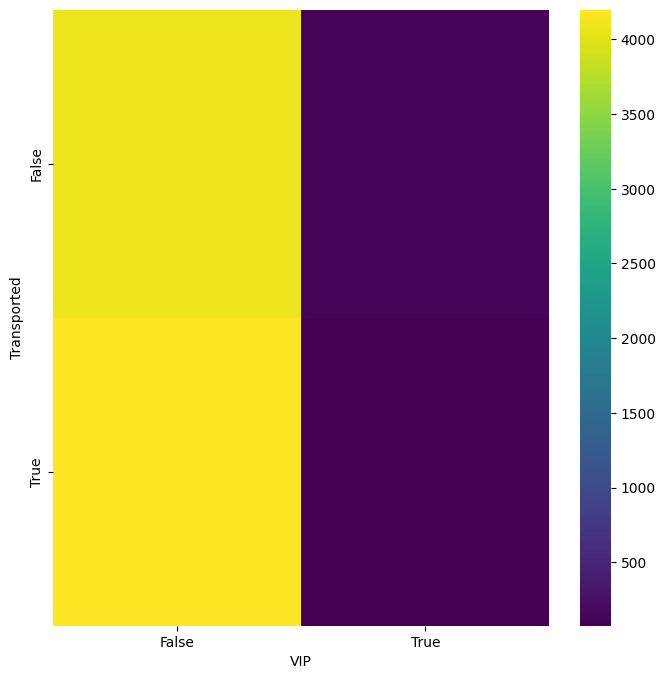

In [7]:
# @title VIP vs Transported

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in train_data.groupby('VIP')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('VIP')
_ = plt.ylabel('Transported')

<Axes: xlabel='Destination', ylabel='count'>

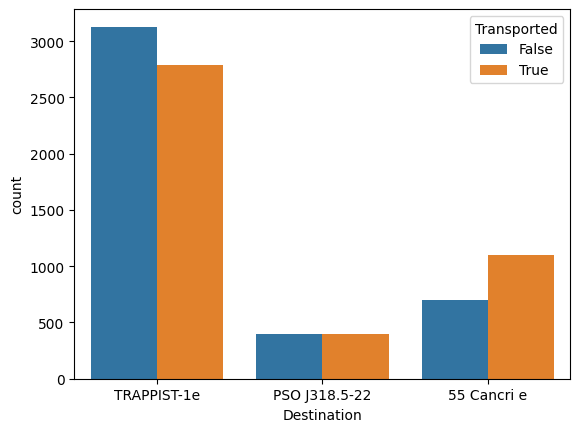

In [8]:
# @title Proportion Transported by Destination

sns.countplot(data=train_data, x="Destination", hue="Transported")

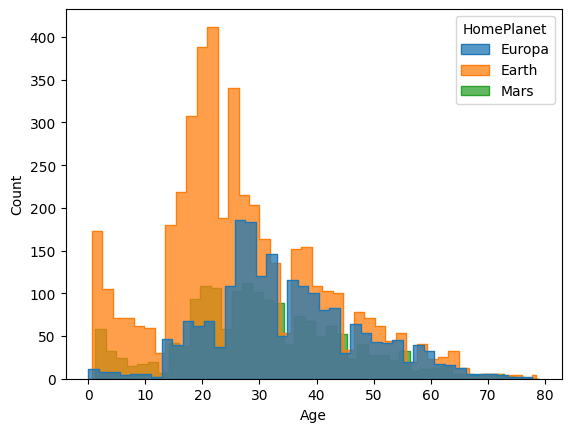

In [9]:
# @title Age distribution by Home Planet

import matplotlib.pyplot as plt
sns.histplot(data=train_data, x='Age', hue='HomePlanet', multiple='dodge', element='step', stat='count')
plt.xlabel('Age')
_ = plt.ylabel('Count')

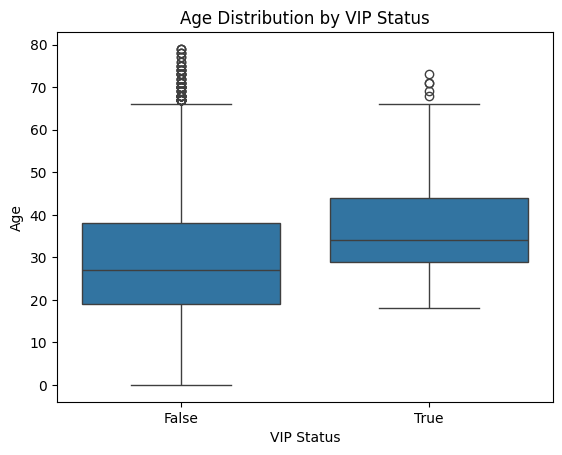

In [10]:
# @title Age distribution by VIP status

import matplotlib.pyplot as plt
sns.boxplot(x='VIP', y='Age', data=train_data)
plt.xlabel('VIP Status')
plt.ylabel('Age')
_ = plt.title('Age Distribution by VIP Status')

In [11]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Transported Column : BAR CHART**

<Axes: >

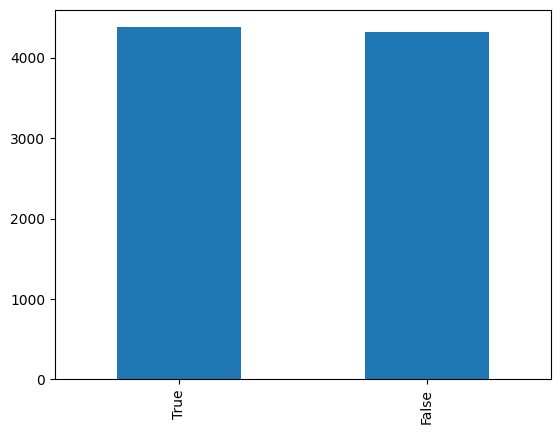

In [12]:
# Display the distribution of the target variable 'Transported' in the training data
plot_train = train_data.Transported.value_counts()
plot_train.plot(kind="bar")

**Preparing Dataset**

In [13]:
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
train_data.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


**Checking For Missing Values**

In [14]:
print("Train data info: ")
print(train_data.info())

Train data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB
None




>**From the above information , the total null count of many columns is less than the total number of entries which indicates that we may need to handle missing values.**


In [15]:
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

**Dataset Characteristics:**
*  The dataset contains a mix of numeric, categorical, and missing features.

**TF-DF Native Support:**
*  TensorFlow Decision Forests (TF-DF) has native support for handling numeric, categorical, and missing features. This means TF-DF can seamlessly work with these different types of data without requiring additional preprocessing.

**Boolean Fields with Missing Values:**
*  However, there is a specific case to address: the dataset includes boolean fields with missing values.

**TF-DF Limitation with Boolean Fields:**
* TF-DF currently does not support boolean fields directly. As a workaround, we need to convert these boolean fields into integer format. This conversion allows us to represent boolean values as 0 (for False) and 1 (for True), making them compatible with TF-DF.

**Handling Missing Values in Boolean Fields:**
*  Additionally, the boolean fields contain missing values. To ensure compatibility with TF-DF, we will replace these missing boolean values with zeros. This ensures that TF-DF interprets the missing boolean values as False during model training.

**Handling Missing Values in Numerical Columns:**
*  In this specific approach, we will also replace null (missing) values with zero for numerical columns. This step simplifies the handling of missing numerical values and aligns with the decision to convert boolean fields to integers, all while allowing TF-DF to manage missing values in categorical columns.

In [16]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [17]:
# convert boolean columns to int format
train_data["Transported"] = train_data["Transported"].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

**Splitting the Cabines into 3 parts (deck,num,side)**

In [18]:
try:
    # Extracting information from 'Cabin' and creating new columns
    train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
    # Remove original Cabin column from the dataset
    train_data = train_data.drop('Cabin', axis=1)
except KeyError:
    print("ERROR: Field does not exist")

**Preprocesssed Data**

In [19]:
train_data.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


**Splitting DataSet**

In [20]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6996 examples in training, 1697 examples in testing.


In [21]:
# convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).
label='Transported'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

A Random Forest is an ensemble learning method composed of multiple decision trees. Each tree is trained independently on a randomly sampled subset of the training dataset, allowing them to capture diverse patterns. This ensemble approach enhances model robustness and mitigates overfitting. TensorFlow Decision Forests simplifies the user experience by providing effective default hyperparameters based on benchmarks, ensuring good performance. Users have the flexibility to fine-tune the learning algorithm with various configuration options for optimizing accuracy.

**Create Random Forest**

In [22]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmpss72rs88 as temporary training directory


**Train the Model**

In [23]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:07.006030. Found 6996 examples.
Training model...
Model trained in 0:01:50.295722
Compiling model...
Model compiled.


**Visualizing the model**

In [23]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

**Validation Dataset:**

A portion (20%) of the dataset is set aside as a validation dataset to assess the model's performance on unseen data. This helps measure how well the model generalizes to new observations not seen during training.

**Out-of-Bag (OOB) Score:**

During the training of the Random Forest Model, each decision tree is trained on a random subset of the training set (chosen with replacement). The remaining samples, not included in the training subset, form the Out-of-Bag (OOB) data. The OOB score is computed by evaluating the model's predictions on this untouched data subset. This provides an additional measure of the model's performance and serves as a validation metric without the need for a separate validation set.

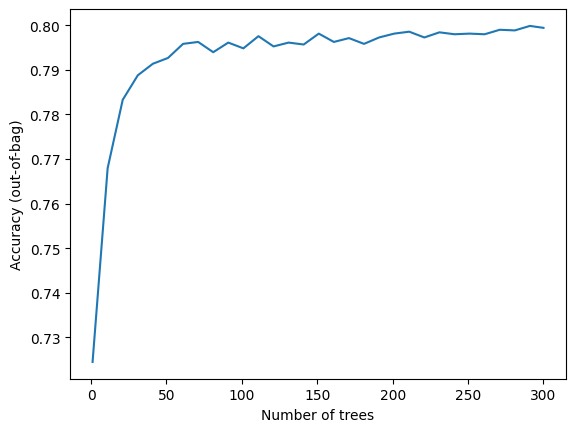

In [24]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [25]:
# General stats on the OOB dataset
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6959, accuracy=0.7993964650093405, loss=0.5212467518777757, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

**Evaluating the Model**

In [26]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 7s 90ms/step - loss: 0.0000e+00 - accuracy: 0.7866
loss: 0.0000
accuracy: 0.7866


Variable importances assess the contribution of each feature to a model's predictions. In TensorFlow Decision Forests, there are various methods to identify important features. The example mentions the Variable Importance `NUM_AS_ROOT`, which represents how often a feature is used as the root node in decision trees. A higher importance score for this feature implies greater impact on the model's outcome. The list is sorted by default, showcasing features from most to least important. This information helps understand which features are frequently chosen as the starting point for decision trees in the random forest, providing insights into their significance in influencing model predictions.

In [27]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_NODES
	 SUM_SCORE
	 NUM_AS_ROOT


In [28]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 114.0),
 ("RoomService" (1; #7), 64.0),
 ("Spa" (1; #10), 64.0),
 ("VRDeck" (1; #12), 34.0),
 ("ShoppingMall" (1; #8), 14.0),
 ("FoodCourt" (1; #5), 8.0),
 ("Deck" (4; #3), 1.0),
 ("HomePlanet" (4; #6), 1.0)]

**Submission**

In [29]:
submission_id = test_data.PassengerId

# Replace NaN values with zero
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

In [30]:
# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)


In [31]:
# Convert pd dataframe to tf dataset
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

# Get the predictions for testdata
predictions = rf.predict(test_data)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 1s 107ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [33]:
#uploaded_sub = files.upload()
# Load the submission file
sub_data = pd.read_csv("/content/drive/MyDrive/kg_datasets/sample_submission.csv")

In [34]:
sub_data['Transported'] = n_predictions
sub_data.to_csv('submission.csv', index=False)
sub_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
